In [2]:
import sys
import os
import pandas as pd
sys.path.append('../../../../Fedot.Industrial')
from fedot_ind.core.architecture.postprocessing.cv_results_parser import *

In [25]:
root = 'results/classification/minerals_200'
ds_name = 'minerals 200'
baseline = {'Baseline': os.path.join(root, 'ResNet18')}
sfp_exps = {
    'energy': {f'SFP energy {e}':  os.path.join(root, f'ResNet18_SFP_energy_threshold-{e}') for e in [0.99, 0.994]},
    'percentage': {f'SFP {pr * 100}%': os.path.join(root, f'ResNet18_SFP_pruning_ratio-{pr}') for pr in [0.1, 0.2]},
}
hoer_loss_factor = [0.1]
orthogonal_loss_factor = [10]
svd_exps = {
    'channel': {f'Channel Hoer {hoer} Ort {ort}': os.path.join(root, f'ResNet18_SVD_channel_O-{ort}_H-{hoer}') for hoer in hoer_loss_factor for ort in orthogonal_loss_factor},
    'spatial': {f'Spatial Hoer {hoer} Ort {ort}':os.path.join(root, f'ResNet18_SVD_spatial_O-{ort}_H-{hoer}') for hoer in hoer_loss_factor for ort in orthogonal_loss_factor},
}

In [26]:
svd_channel = compare_svd_results(
    baseline=baseline['Baseline'],
    svd_exps=svd_exps['channel'],
    metric='f1'
)
svd_spatial = compare_svd_results(
    baseline=baseline['Baseline'],
    svd_exps=svd_exps['spatial'],
    metric='f1'
)
sfp_energy = compare_sfp_results(
    baseline=baseline['Baseline'],
    sfp_exps=sfp_exps['energy'],
    metric='f1'
)
sfp_per = compare_sfp_results(
    baseline=baseline['Baseline'],
    sfp_exps=sfp_exps['percentage'],
    metric='f1'
)
get_best_metric(
    exp_path=baseline['Baseline'],
    metric='f1'
)

0.9916659184569356

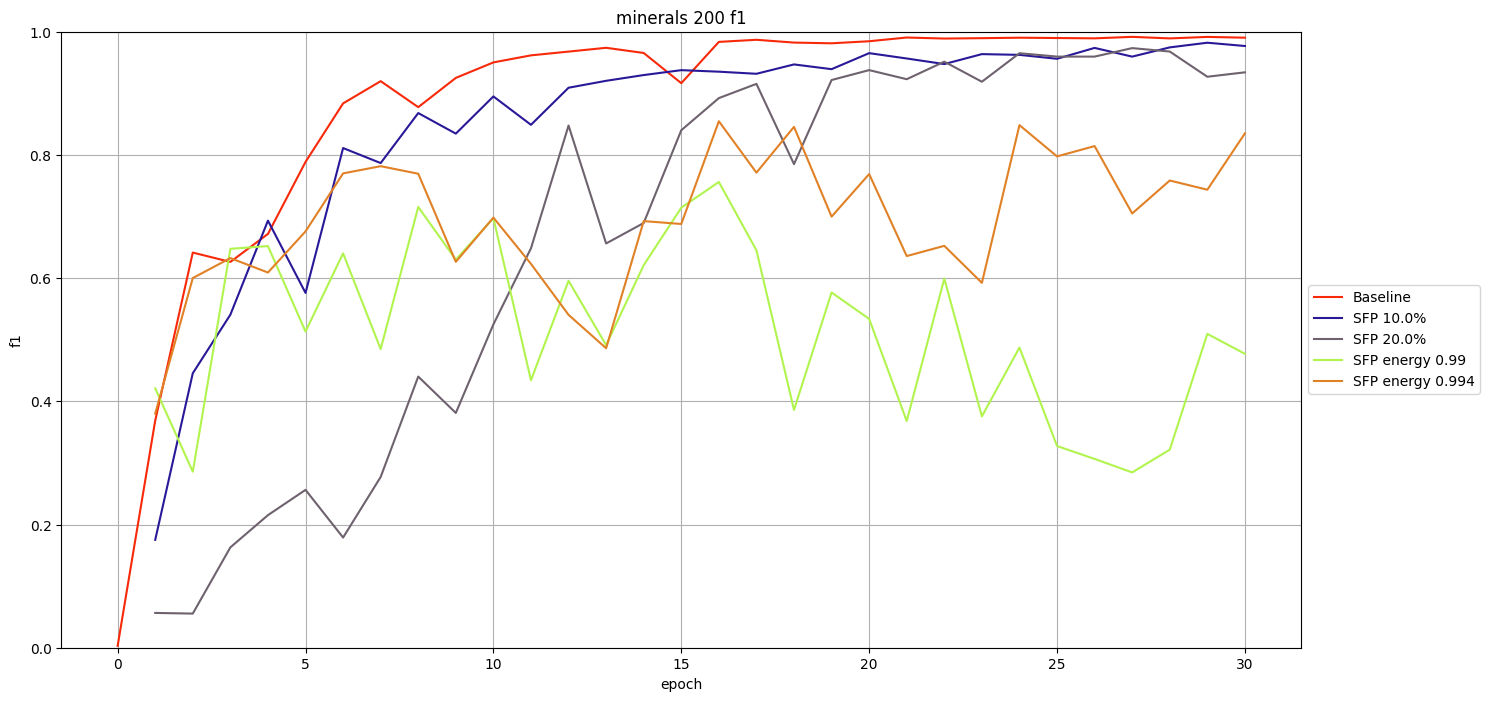

In [30]:
exps = {**baseline}
exps.update(sfp_exps['percentage'])
exps.update(sfp_exps['energy'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=False,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    # saving_path='f1.png'
)

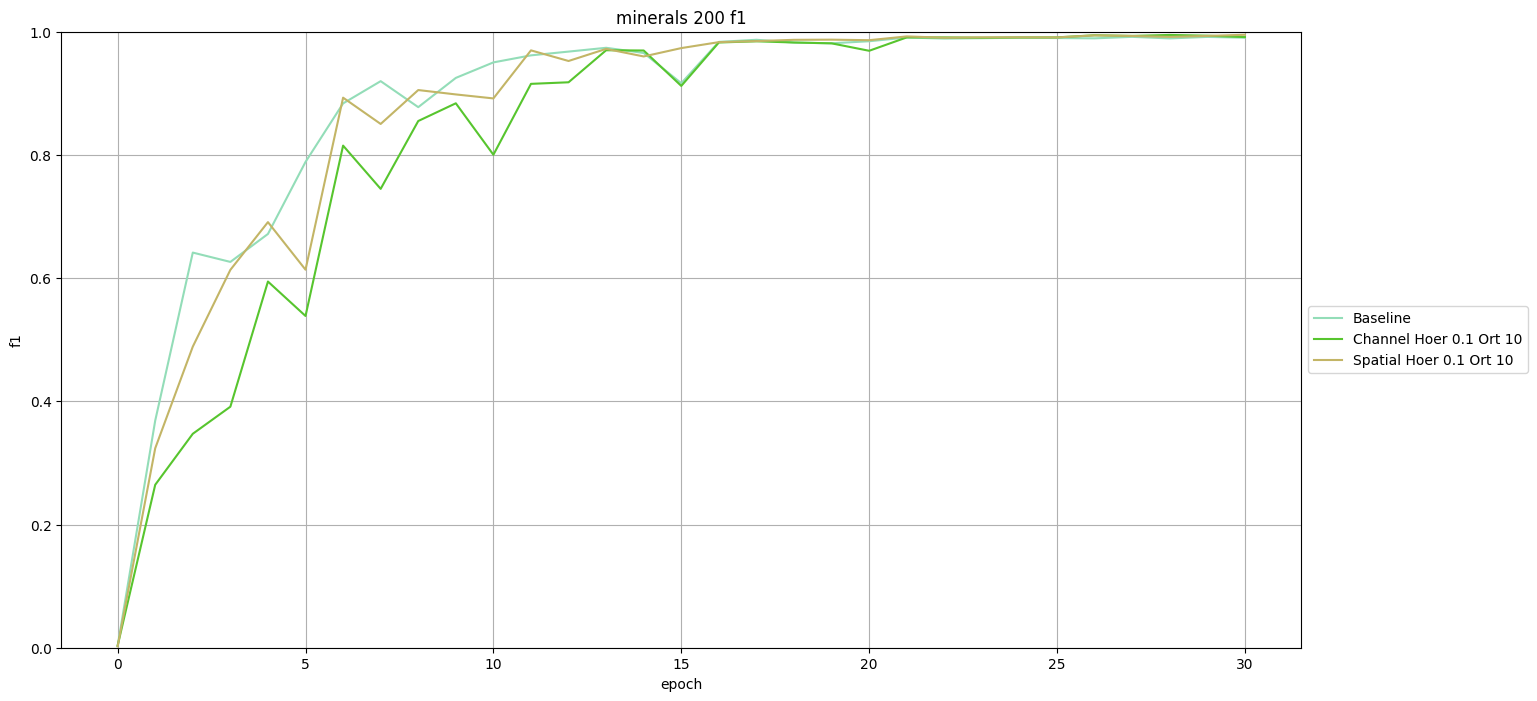

In [31]:
exps = {**baseline}
exps.update(svd_exps['channel'])
exps.update(svd_exps['spatial'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    # saving_path='f1.png'
)

In [33]:
percent = 100
print(f"SFP per prun: {sfp_per.loc[sfp_per['pruned']>=percent]['size'].min():.1f}")
print(f"SFP per ft: {sfp_per.loc[sfp_per['fine-tuned']>=percent]['size'].min():.1f}")
print(f"SFP energy prun: {sfp_energy.loc[sfp_energy['pruned']>=percent]['size'].min():.1f}")
print(f"SFP energy ft: {sfp_energy.loc[sfp_energy['fine-tuned']>=percent]['size'].min():.1f}")

df = svd_channel['Channel Hoer 0.1 Ort 10']
print(f"SVD channel prun: {df.loc[df['pruned']>=percent].index.min():.1f}")
print(f"SVD channel ft: {df.loc[df['fine-tuned']>=percent].index.min():.1f}")
df = svd_spatial['Spatial Hoer 0.1 Ort 10']
print(f"SVD spatial prun: {df.loc[df['pruned']>=percent].index.min():.1f}")
print(f"SVD spatial ft: {df.loc[df['fine-tuned']>=percent].index.min():.1f}")

SFP per prun: nan
SFP per ft: 77.0
SFP energy prun: nan
SFP energy ft: nan
SVD channel prun: 16.8
SVD channel ft: 16.8
SVD spatial prun: 10.3
SVD spatial ft: 10.3


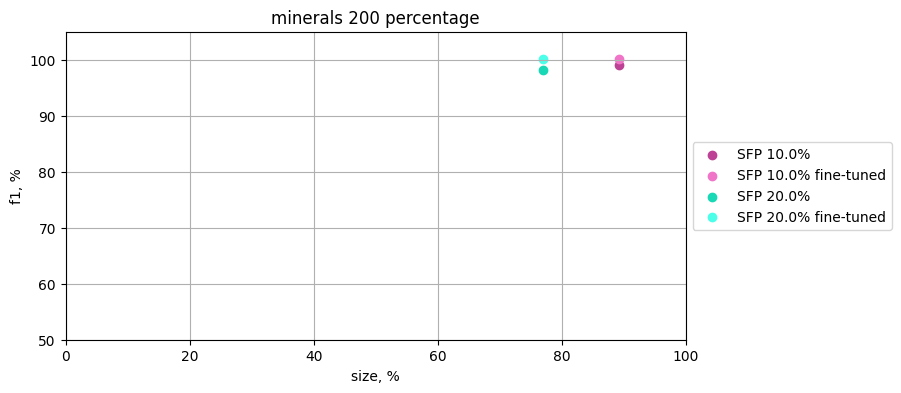

In [38]:
ax = show_sfp_results(
    sfp_exps=sfp_per,
    figsize=(8, 4),
    title=f'{ds_name} percentage',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(50, 105),
    xlim=(0, 100)
)

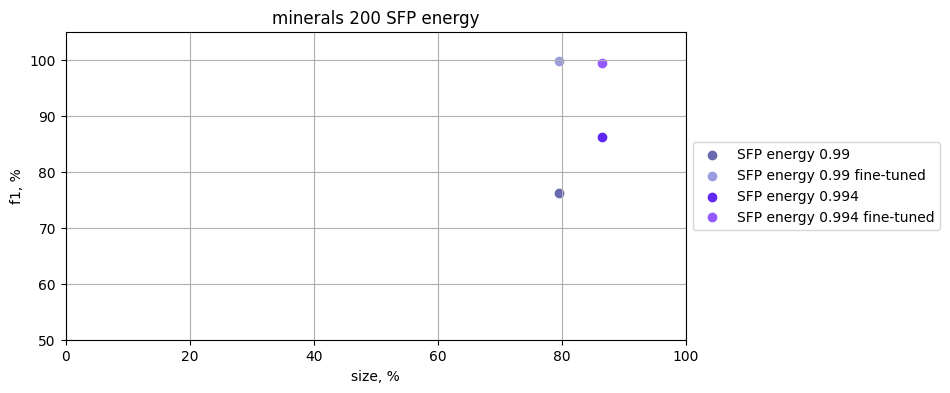

In [37]:
ax = show_sfp_results(
    sfp_exps=sfp_energy,
    figsize=(8, 4),
    title=f'{ds_name} SFP energy',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(50, 105),
    xlim=(0, 100)
)

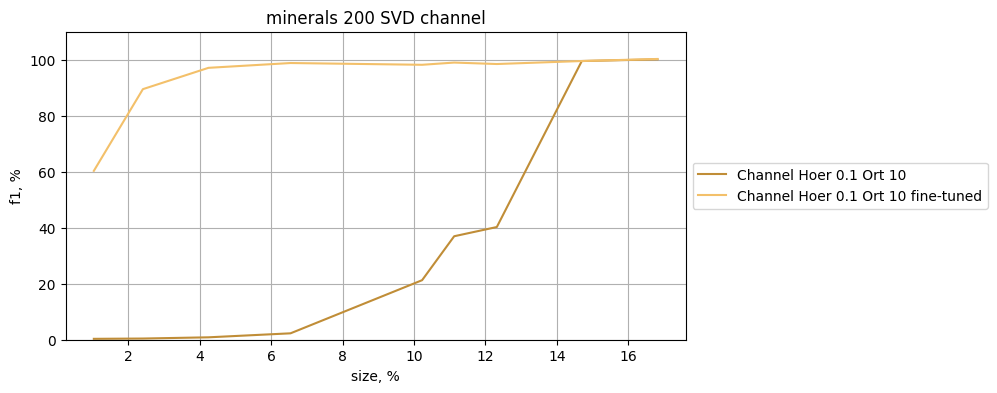

In [42]:
ax = show_svd_results(
    svd_exps=svd_channel,
    figsize=(8, 4),
    title=f'{ds_name} SVD channel',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(0, 110),
    # xlim=(0, 100)
)

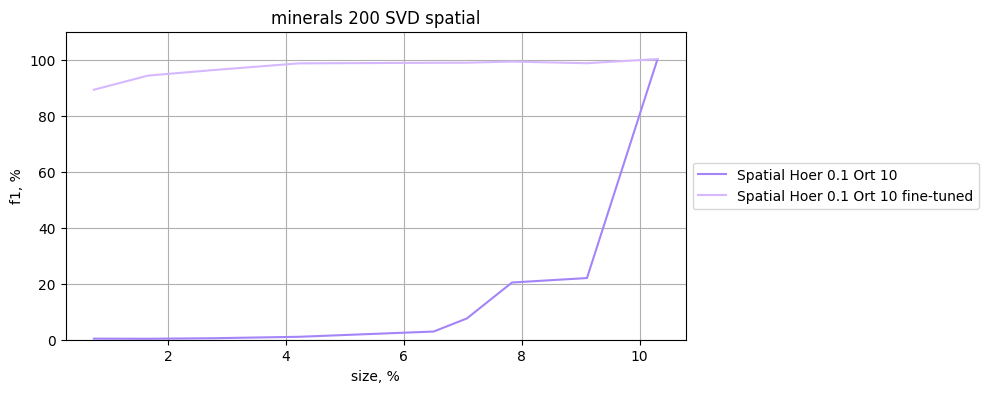

In [44]:
ax = show_svd_results(
    svd_exps=svd_spatial,
    figsize=(8, 4),
    title=f'{ds_name} SVD spatial',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(0, 110),
    # xlim=(0, 100)
)

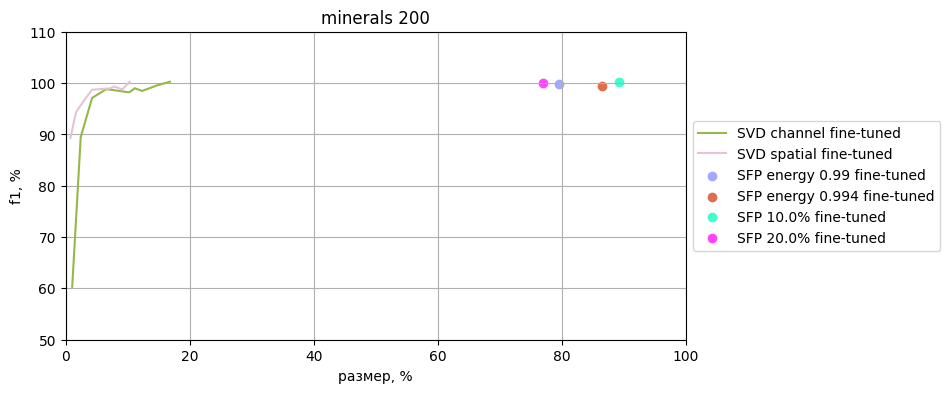

In [47]:
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([sfp_energy, sfp_per])[['size', 'fine-tuned']],
    svd_exps={
        'SVD channel': svd_channel['Channel Hoer 0.1 Ort 10'][['fine-tuned']],
        'SVD spatial': svd_spatial['Spatial Hoer 0.1 Ort 10'][['fine-tuned']],
    },
    figsize=(8, 4),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='размер, %',
    ylabel='f1, %',
    ylim=(50, 110),
    xlim=(0, 100)
)